## Import Libraries & Data Overview

The file **Banks.csv** includes data on a sample of 20 banks.

The “Financial Condition” column records the judgment of an expert on the financial condition of each bank. This response variable takes one of two possible values—weak or strong—according to the financial condition of the bank.

The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets.

The target is to classify the financial condition of a new bank using the two ratios.


### Load Packages & Import Dataset

In [1]:
# Load the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.formula.api as SM

In [3]:
# Import the dataset
from google.colab import files
uploaded = files.upload()

Saving Banks.csv to Banks (1).csv


In [4]:
df = pd.read_csv('Banks.csv')
df.head()

,Obs,FinancialCondition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


In [5]:
df.isna().sum().sum()

0

In [6]:
df.groupby('FinancialCondition').sum()

,Obs,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
FinancialCondition,,,,
0,155,119.2,0.88,5.47
1,55,67.2,1.21,7.10


In [7]:
df.shape

(20, 5)

<Axes: >

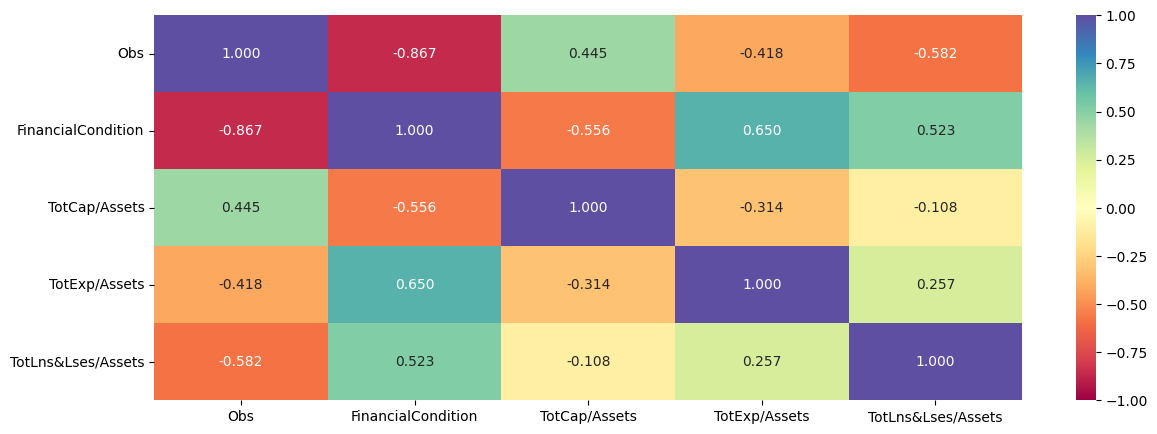

In [8]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".3f",cmap="Spectral")


There are no correlations which are greater than 0.9

## Logistic Regression Model

### Modeling

Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures, TotLns&Lses/Assets and TotExp/Assets.

Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.


In [9]:
X=df[['TotExp/Assets','TotLns&Lses/Assets']]
y = df['FinancialCondition']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(16, 2)
(4, 2)


In [12]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred = lr_model.predict(X_test)
y_probabilities=lr_model.predict_proba(X)

In [14]:
y_probabilities

array([[0.49982972, 0.50017028],
       [0.50435661, 0.49564339],
       [0.44981373, 0.55018627],
       [0.4977939 , 0.5022061 ],
       [0.49465331, 0.50534669],
       [0.48698828, 0.51301172],
       [0.48116804, 0.51883196],
       [0.50223385, 0.49776615],
       [0.4886548 , 0.5113452 ],
       [0.50944517, 0.49055483],
       [0.53175721, 0.46824279],
       [0.47904855, 0.52095145],
       [0.49612644, 0.50387356],
       [0.51793003, 0.48206997],
       [0.48984622, 0.51015378],
       [0.54929206, 0.45070794],
       [0.52346539, 0.47653461],
       [0.51405662, 0.48594338],
       [0.53037633, 0.46962367],
       [0.52069834, 0.47930166]])

In [15]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print(acc)

0.75


### Estimated Equations

Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

a. The logit as a function of the predictors

b. The odds as a function of the predictors

c. The probability as a function of the predictors


In [16]:
lr_model.coef_


array([[0.14732526, 0.55449175]])

In [17]:
lr_model.intercept_

array([-0.37741753])

a) logit = 0.14732526TotExp/Assets + 0.55449175 * TotLns&Lses/Assets * -0.37741753

b)odds = e^(logit) => e^(0.14732526 * TotExp/Assets + 0.55449175 * TotLns&Lses/Assets * -0.37741753)

c)p=odds/(1+odds) => 1/1+(1/odds) => 1/1+e^-(0.14732526 * TotExp/Assets + 0.55449175 * TotLns&Lses/Assets * -0.37741753)



## Classify Financial Condition of New Bank

### Estimates for New Bank

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11.

From your logistic regression model, estimate the following four quantities for this bank:

the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

In [18]:
d = [[0.11, 0.6]]
new_bank = pd.DataFrame(d, columns=['TotExp/Assets', 'TotLns&Lses/Assets'])


In [19]:
lr_model.predict(new_bank)

array([0])

In [20]:
prob = lr_model.predict_proba(new_bank)[0][1]
classification = "Financially Weak" if prob >= 0.5 else "Strong bank"
print(f'Classification : {classification}')
print(f'Probability of Being Financially Weak: {prob}')

Classification : Strong bank
Probability of Being Financially Weak: 0.49287130778797716


In [21]:
#odds= p/1-p
p_value = prob
odds_value = p_value/(1-p_value)
odds_value

0.971886062368396

In [22]:
##logit = ln(odds)
logit_value = np.log(odds_value)
logit_value

-0.02851670117807477

### Classify New Bank

We use a cutoff value of 0.5 to classify a record based on propensity.

Instead, if we want to classify the record using the odds or logit, what value should we take as a cutoff?

In [23]:
#odds = p/1-p
p_new=0.5
odds=p_new/(1-p_new)
odds

1.0

In [24]:
logit=np.log(odds) #the odds value we got is 1
logit

0.0

### Cutoff Value

When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than a financially strong bank misclassified as weak.

To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

In [25]:
def check(prob,cutoff):
  if prob>=cutoff:
    return 1
  else :
    return 0

In [26]:
poor_to_strongs=[]
prediction_df=pd.DataFrame()
prediction_df["actual"]=y
prediction_df["predicted_probability_of_1"]=lr_model.predict_proba(X)[:,1]
for cutoff in np.arange(0,1.1,0.1):
    prediction_df["predicted"]=prediction_df["predicted_probability_of_1"].apply(lambda x: check(x,cutoff))
    poor_to_strongs.append(len(prediction_df[(prediction_df["actual"]==1) & (prediction_df["predicted"]==0)]))


In [27]:
poor_to_strongs # we can see that as the cutoff with respect to 1 s probability should be decreased to reduce the miss classification error

[0, 0, 0, 0, 0, 3, 10, 10, 10, 10, 10]